In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
flights_df = pd.read_csv("data/Flight_Database.csv")
weather_data = pd.read_csv("data/M1_final.csv")
cities_weather = pd.read_csv("data/weather_data_cities.csv")
cities_time = pd.read_csv("data/Cities_FlightDuration_Mins.csv")

In [3]:
flights_df.shape, weather_data.shape, cities_weather.shape, cities_time.shape

((10, 10), (28820, 23), (15, 25), (15, 16))

In [4]:
flights_df.head()

FlightID    DEP_City ARR_City  Fuel_Cap  Pass_Load Dep_Time  \
0   AI-266      Mumbai  Chennai      6956        221    11:26   
1   AI-861     Kolkata   Nagpur      6240        238    12:03   
2   AI-234     Lucknow  Kolkata      4111        246    20:09   
3   AI-867  Chandigarh   Mumbai      6172        145    16:19   
4   AI-338      Indore  Kolkata      6505        232     7:53   

   Days_Since_Serving  Warranty_Status  Days_Since_Purchase        Model  
0                 298            False                  758  Airbus A319  
1                 245             True                  840  Airbus A320  
2                 178            False                  640   Boeing 777  
3                 274             True                  971   Boeing 787  
4                 604            False                  648  Airbus A319

In [5]:
weather_data.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   
3     11             1            5                B6   N999JQ  MCO   
4     11             1            5                DL   N880DN  ATL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  \
0         -1               124       636        324  ...         34        58   
1         -7               371      2475        340  ...         34        58   
2         40               181      1069        301  ...         34        58   
3         -2               168       944        345  ...         34        58   
4         -4               139       760        360  ...         32        58   

   Wind Wind Speed  Wind Gust Pressure      Condition   sch_dep  sch_arr  \
0     W         25         38    29.86   Fair / Windy         9       17   
1     W         25         38    29.86   Fair / Windy         9       17   
2     W         25         38    29.86   Fair / Windy         9       17   
3     W         25         38    29.86   Fair / Windy         9       17   
4     W         24         35    29.91   Fair / Windy         9       17   

  TAXI_OUT  
0       14  
1       15  
2       22  
3       12  
4       13  

[5 rows x 23 columns]

In [6]:
cities_weather.head()

City                                              00:00  \
0     Mumbai  {'Temperature': 30.18, 'Humidity': 0.88, 'Wind...   
1      Delhi  {'Temperature': 41.8, 'Humidity': 40.98, 'Wind...   
2  Bangalore  {'Temperature': 38.22, 'Humidity': 28.16, 'Win...   
3    Chennai  {'Temperature': 23.8, 'Humidity': 64.31, 'Wind...   
4    Kolkata  {'Temperature': 37.81, 'Humidity': 21.63, 'Win...   

                                               01:00  \
0  {'Temperature': 40.2, 'Humidity': 53.21, 'Wind...   
1  {'Temperature': 24.67, 'Humidity': 9.87, 'Wind...   
2  {'Temperature': 44.38, 'Humidity': 21.2, 'Wind...   
3  {'Temperature': 27.49, 'Humidity': 35.37, 'Win...   
4  {'Temperature': 30.08, 'Humidity': 2.83, 'Wind...   

                                               02:00  \
0  {'Temperature': 26.71, 'Humidity': 29.89, 'Win...   
1  {'Temperature': 43.6, 'Humidity': 39.79, 'Wind...   
2  {'Temperature': 28.25, 'Humidity': 57.18, 'Win...   
3  {'Temperature': 32.96, 'Humidity': 55.4, 'Wind...   
4  {'Temperature': 46.01, 'Humidity': 7.86, 'Wind...   

                                               03:00  \
0  {'Temperature': 42.68, 'Humidity': 64.77, 'Win...   
1  {'Temperature': 20.19, 'Humidity': 12.9, 'Wind...   
2  {'Temperature': 22.67, 'Humidity': 35.35, 'Win...   
3  {'Temperature': 24.66, 'Humidity': 7.62, 'Wind...   
4  {'Temperature': 27.35, 'Humidity': 49.39, 'Win...   

                                               04:00  \
0  {'Temperature': 28.28, 'Humidity': 55.6, 'Wind...   
1  {'Temperature': 46.01, 'Humidity': 68.38, 'Win...   
2  {'Temperature': 21.97, 'Humidity': 36.85, 'Win...   
3  {'Temperature': 27.35, 'Humidity': 67.51, 'Win...   
4  {'Temperature': 30.64, 'Humidity': 11.62, 'Win...   

                                               05:00  \
0  {'Temperature': 44.17, 'Humidity': 20.91, 'Win...   
1  {'Temperature': 24.57, 'Humidity': 71.46, 'Win...   
2  {'Temperature': 29.8, 'Humidity': 55.3, 'Wind ...   
3  {'Temperature': 45.63, 'Humidity': 20.95, 'Win...   
4  {'Temperature': 31.18, 'Humidity': 25.74, 'Win...   

                                               06:00  \
0  {'Temperature': 26.23, 'Humidity': 50.11, 'Win...   
1  {'Temperature': 31.5, 'Humidity': 30.55, 'Wind...   
2  {'Temperature': 35.11, 'Humidity': 18.72, 'Win...   
3  {'Temperature': 24.1, 'Humidity': 34.65, 'Wind...   
4  {'Temperature': 23.76, 'Humidity': 17.57, 'Win...   

                                               07:00  \
0  {'Temperature': 20.89, 'Humidity': 26.76, 'Win...   
1  {'Temperature': 29.3, 'Humidity': 36.74, 'Wind...   
2  {'Temperature': 25.96, 'Humidity': 53.8, 'Wind...   
3  {'Temperature': 44.68, 'Humidity': 41.6, 'Wind...   
4  {'Temperature': 45.3, 'Humidity': 66.73, 'Wind...   

                                               08:00  ...  \
0  {'Temperature': 50.14, 'Humidity': 17.41, 'Win...  ...   
1  {'Temperature': 29.1, 'Humidity': 69.19, 'Wind...  ...   
2  {'Temperature': 28.58, 'Humidity': 70.68, 'Win...  ...   
3  {'Temperature': 50.07, 'Humidity': 24.24, 'Win...  ...   
4  {'Temperature': 26.34, 'Humidity': 31.3, 'Wind...  ...   

                                               14:00  \
0  {'Temperature': 24.58, 'Humidity': 42.99, 'Win...   
1  {'Temperature': 48.28, 'Humidity': 37.11, 'Win...   
2  {'Temperature': 32.42, 'Humidity': 26.18, 'Win...   
3  {'Temperature': 34.28, 'Humidity': 42.51, 'Win...   
4  {'Temperature': 39.65, 'Humidity': 42.0, 'Wind...   

                                               15:00  \
0  {'Temperature': 35.33, 'Humidity': 74.35, 'Win...   
1  {'Temperature': 41.03, 'Humidity': 68.73, 'Win...   
2  {'Temperature': 44.76, 'Humidity': 42.35, 'Win...   
3  {'Temperature': 48.66, 'Humidity': 22.63, 'Win...   
4  {'Temperature': 30.34, 'Humidity': 55.66, 'Win...   

                                               16:00  \
0  {'Temperature': 48.77, 'Humidity': 19.61, 'Win...   
1  {'Temperature': 28.46, 'Humidity': 67.51, 'Win...   
2  {'Temperature': 30.69, 'Humidity':

In [7]:
cities_time.head()

City  Mumbai  Delhi  Bangalore  Chennai  Kolkata  Hyderabad  \
0     Mumbai       0    130        105      115      155         90   
1      Delhi     170      0        170      170      130        135   
2  Bangalore     105    170          0       60      150         70   
3    Chennai     115    170         60        0      135         75   
4    Kolkata     155    130        150      135        0        135   

   Ahmedabad  Pune  Jaipur  Lucknow  Kanpur  Nagpur  Indore  Patna  Chandigarh  
0         75    55     110      125     110      85      80    140         135  
1         95   130      55       70      70     100      90    100          55  
2        135    90     155      150     365     100     115    150         180  
3        140   100     150      150     335     255     120    140         175  
4        170   160     150      100     345     120     145     75         165

In [8]:
# Display basic information about the datasets
print("Flights DataFrame Info:")
flights_df.info()
print("\nWeather Data DataFrame Info:")
weather_data.info()
print("\nCities Weather DataFrame Info:")
cities_weather.info()
print("\nCities Time DataFrame Info:")
cities_time.info()


Flights DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FlightID             10 non-null     object
 1   DEP_City             10 non-null     object
 2   ARR_City             10 non-null     object
 3   Fuel_Cap             10 non-null     int64 
 4   Pass_Load            10 non-null     int64 
 5   Dep_Time             10 non-null     object
 6   Days_Since_Serving   10 non-null     int64 
 7   Warranty_Status      10 non-null     bool  
 8   Days_Since_Purchase  10 non-null     int64 
 9   Model                10 non-null     object
dtypes: bool(1), int64(4), object(5)
memory usage: 862.0+ bytes

Weather Data DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -----------

In [9]:
# Display summary statistics for numerical columns
print("\nFlights DataFrame Summary Statistics:")
print(flights_df.describe())
print("\nWeather Data DataFrame Summary Statistics:")
print(weather_data.describe())
print("\nCities Weather DataFrame Summary Statistics:")
print(cities_weather.describe())
print("\nCities Time DataFrame Summary Statistics:")
print(cities_time.describe())



Flights DataFrame Summary Statistics:
          Fuel_Cap   Pass_Load  Days_Since_Serving  Days_Since_Purchase
count    10.000000   10.000000           10.000000            10.000000
mean   4935.400000  181.900000          350.200000           669.400000
std    1400.331564   47.273319          156.350603           216.665231
min    3020.000000  121.000000          161.000000           375.000000
25%    4073.500000  147.000000          252.250000           515.500000
50%    4395.000000  164.000000          306.500000           644.000000
75%    6223.000000  229.250000          425.500000           819.500000
max    6956.000000  246.000000          604.000000           975.000000

Weather Data DataFrame Summary Statistics:
              MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY  \
count  28820.000000  28820.000000  28820.000000  28820.000000   
mean       7.894240     16.021096      4.008952      6.374983   
std        4.991723      8.750179      1.985230     38.735144   
min      

In [10]:

# Check for missing values
print("\nMissing Values in Flights DataFrame:")
print(flights_df.isnull().sum())
print("\nMissing Values in Weather Data DataFrame:")
print(weather_data.isnull().sum())
print("\nMissing Values in Cities Weather DataFrame:")
print(cities_weather.isnull().sum())
print("\nMissing Values in Cities Time DataFrame:")
print(cities_time.isnull().sum())



Missing Values in Flights DataFrame:
FlightID               0
DEP_City               0
ARR_City               0
Fuel_Cap               0
Pass_Load              0
Dep_Time               0
Days_Since_Serving     0
Warranty_Status        0
Days_Since_Purchase    0
Model                  0
dtype: int64

Missing Values in Weather Data DataFrame:
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
 Condition           0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

Missing Values in Cities Weather DataFrame:
City     0
00:00    0
01:00    0
02:00    0
03:00    0
04:00    0
05:

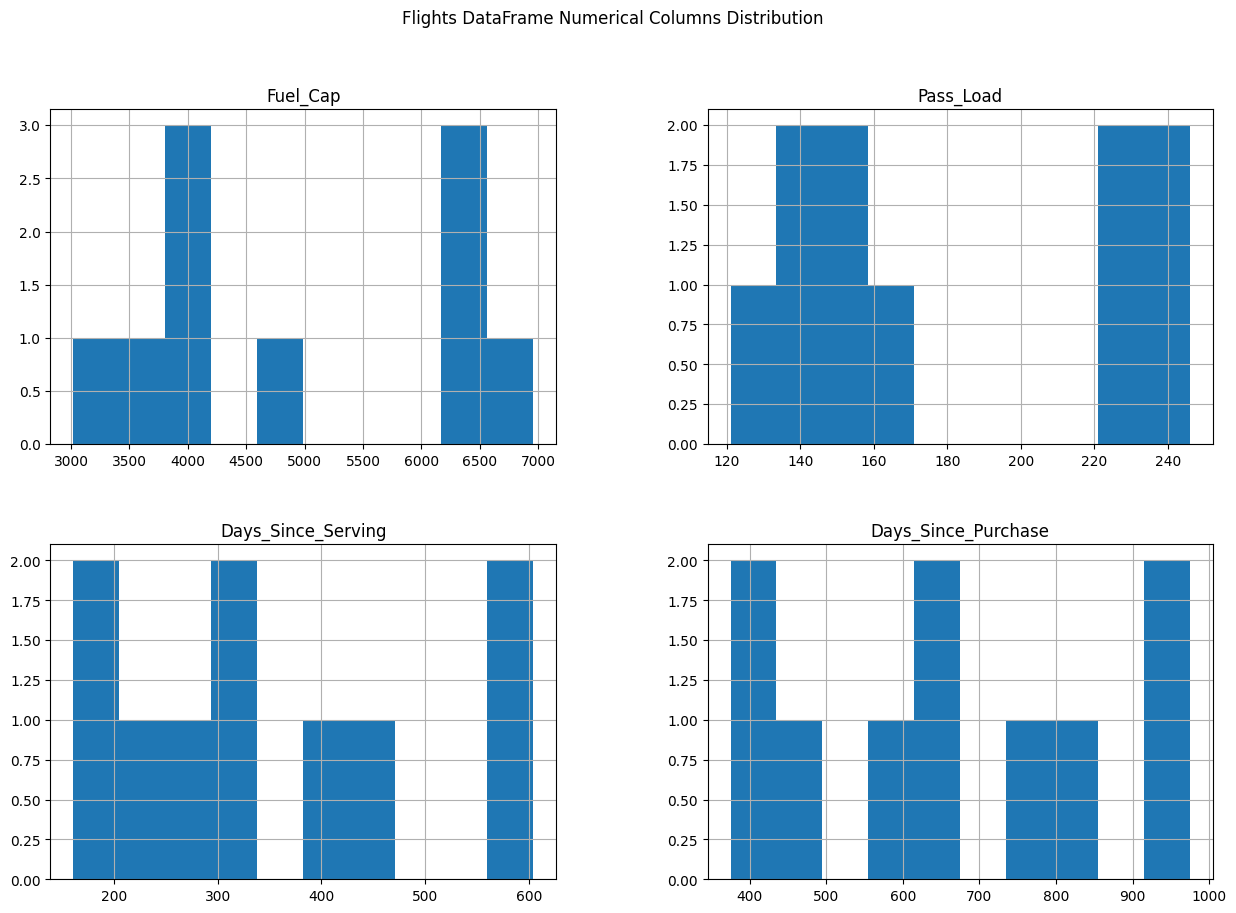

In [11]:

# Plotting distributions of numerical columns
flights_df.hist(figsize=(15, 10))
plt.suptitle("Flights DataFrame Numerical Columns Distribution")
plt.show()


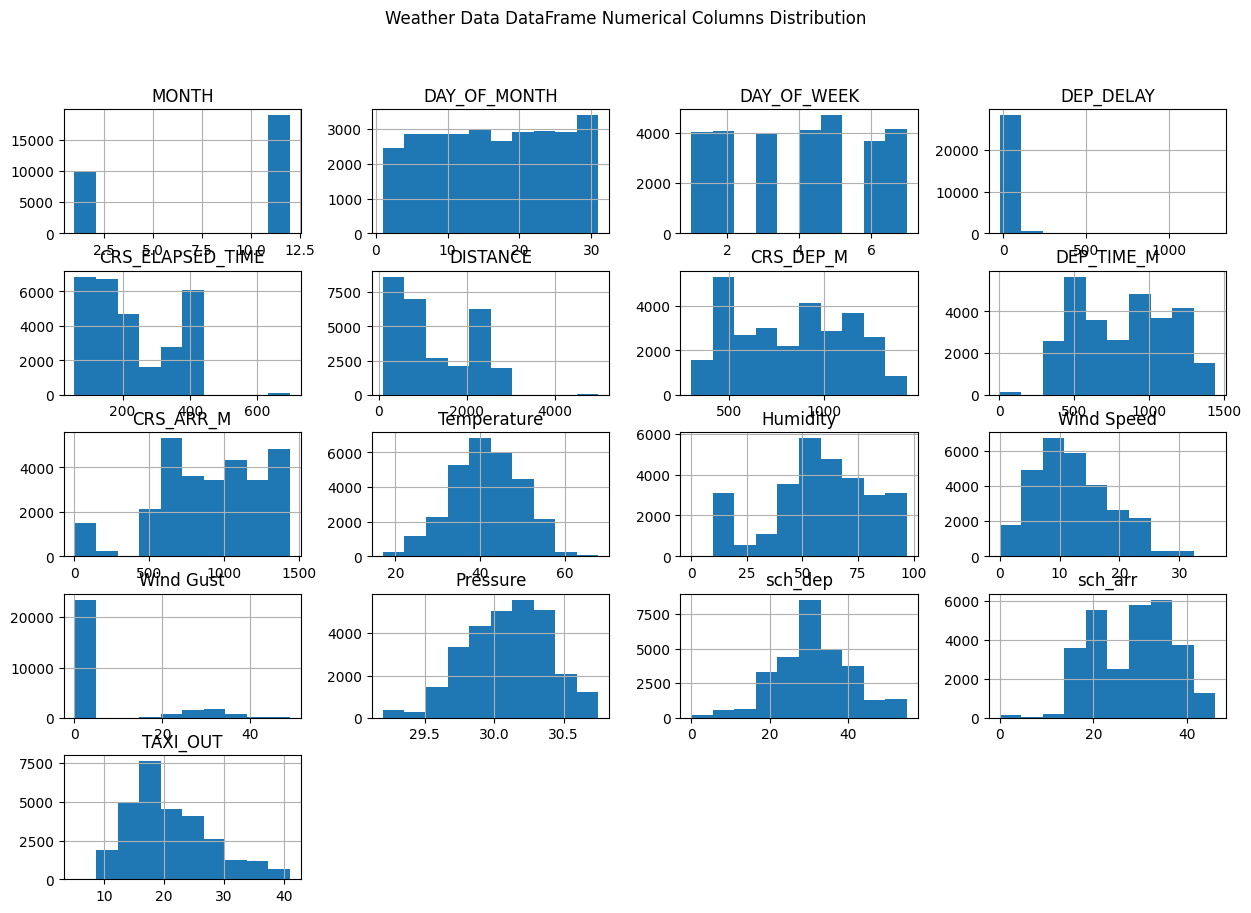

In [12]:
weather_data.hist(figsize=(15, 10))
plt.suptitle("Weather Data DataFrame Numerical Columns Distribution")
plt.show()


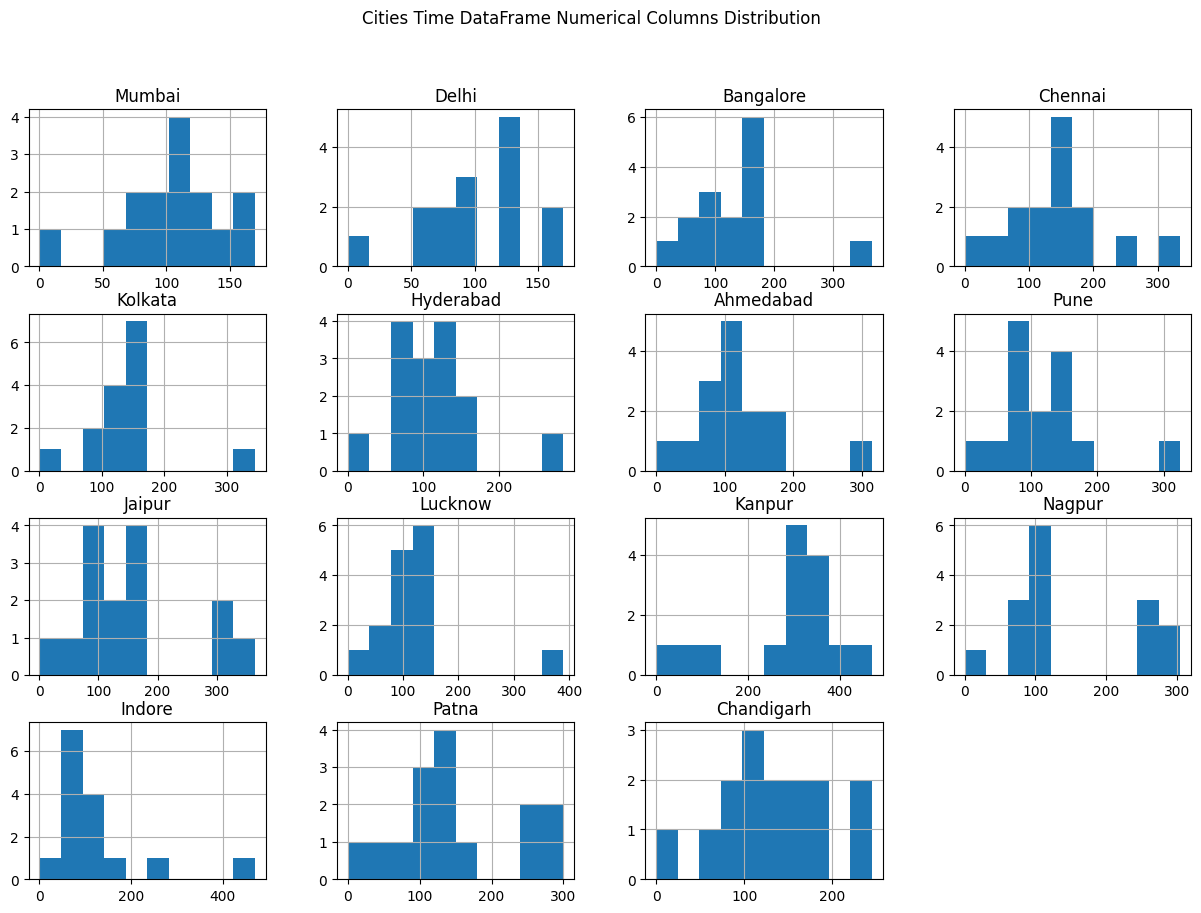

In [13]:

cities_time.hist(figsize=(15, 10))
plt.suptitle("Cities Time DataFrame Numerical Columns Distribution")
plt.show()


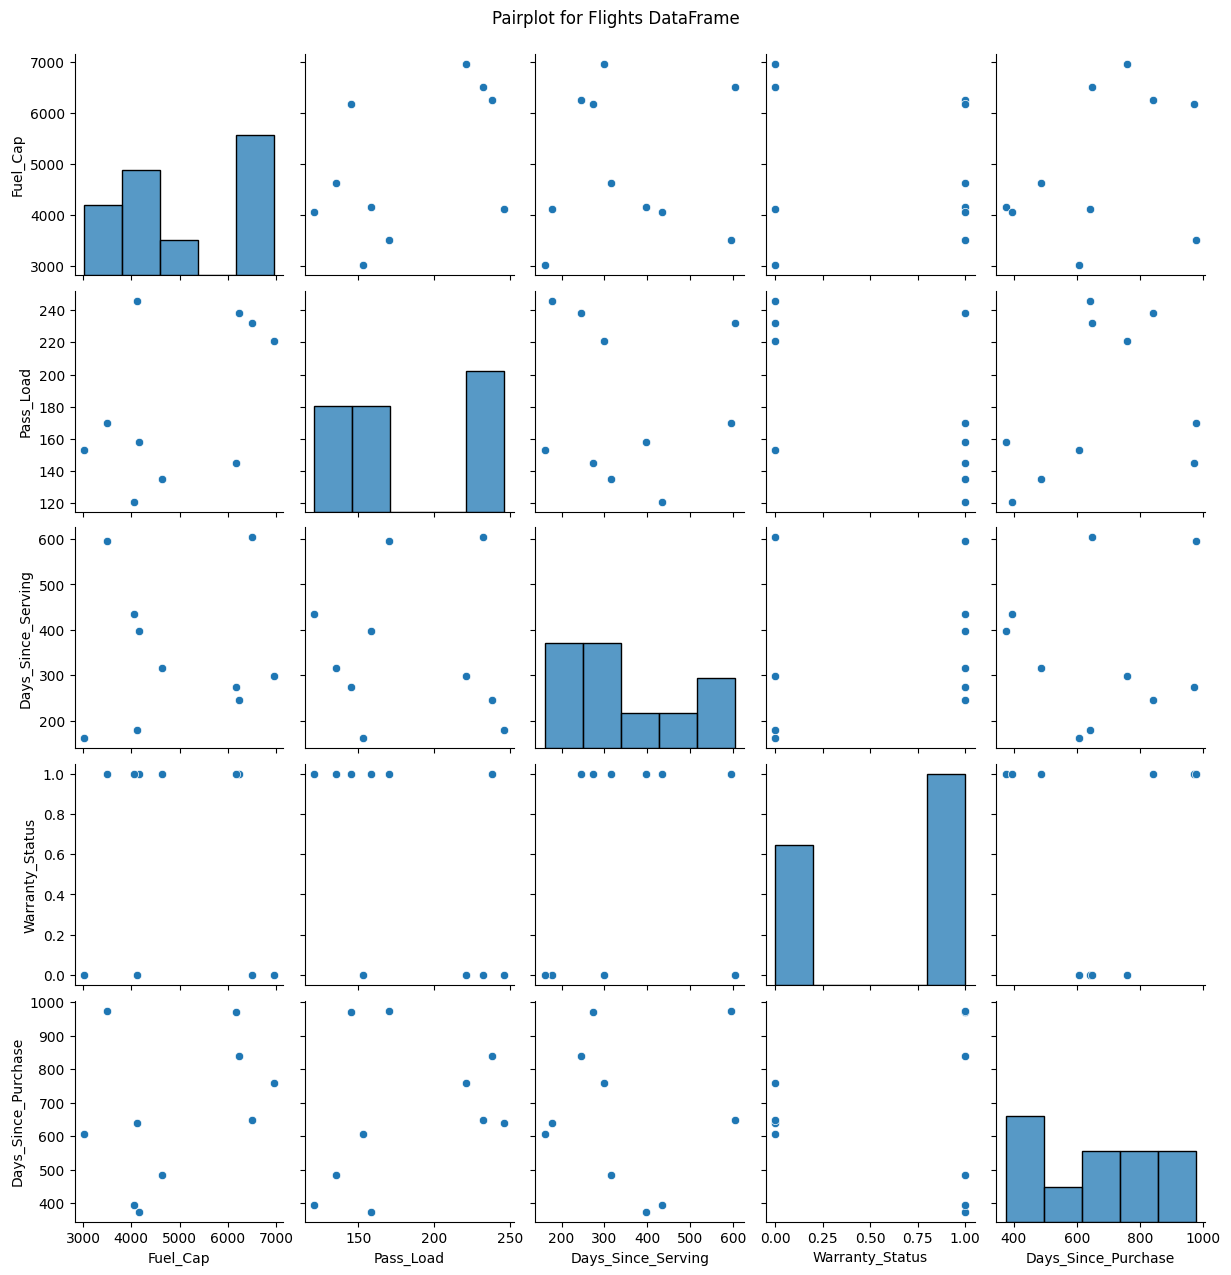

In [14]:

# Pairplot for flights_df
sns.pairplot(flights_df)
plt.suptitle("Pairplot for Flights DataFrame", y=1.02)
plt.show()


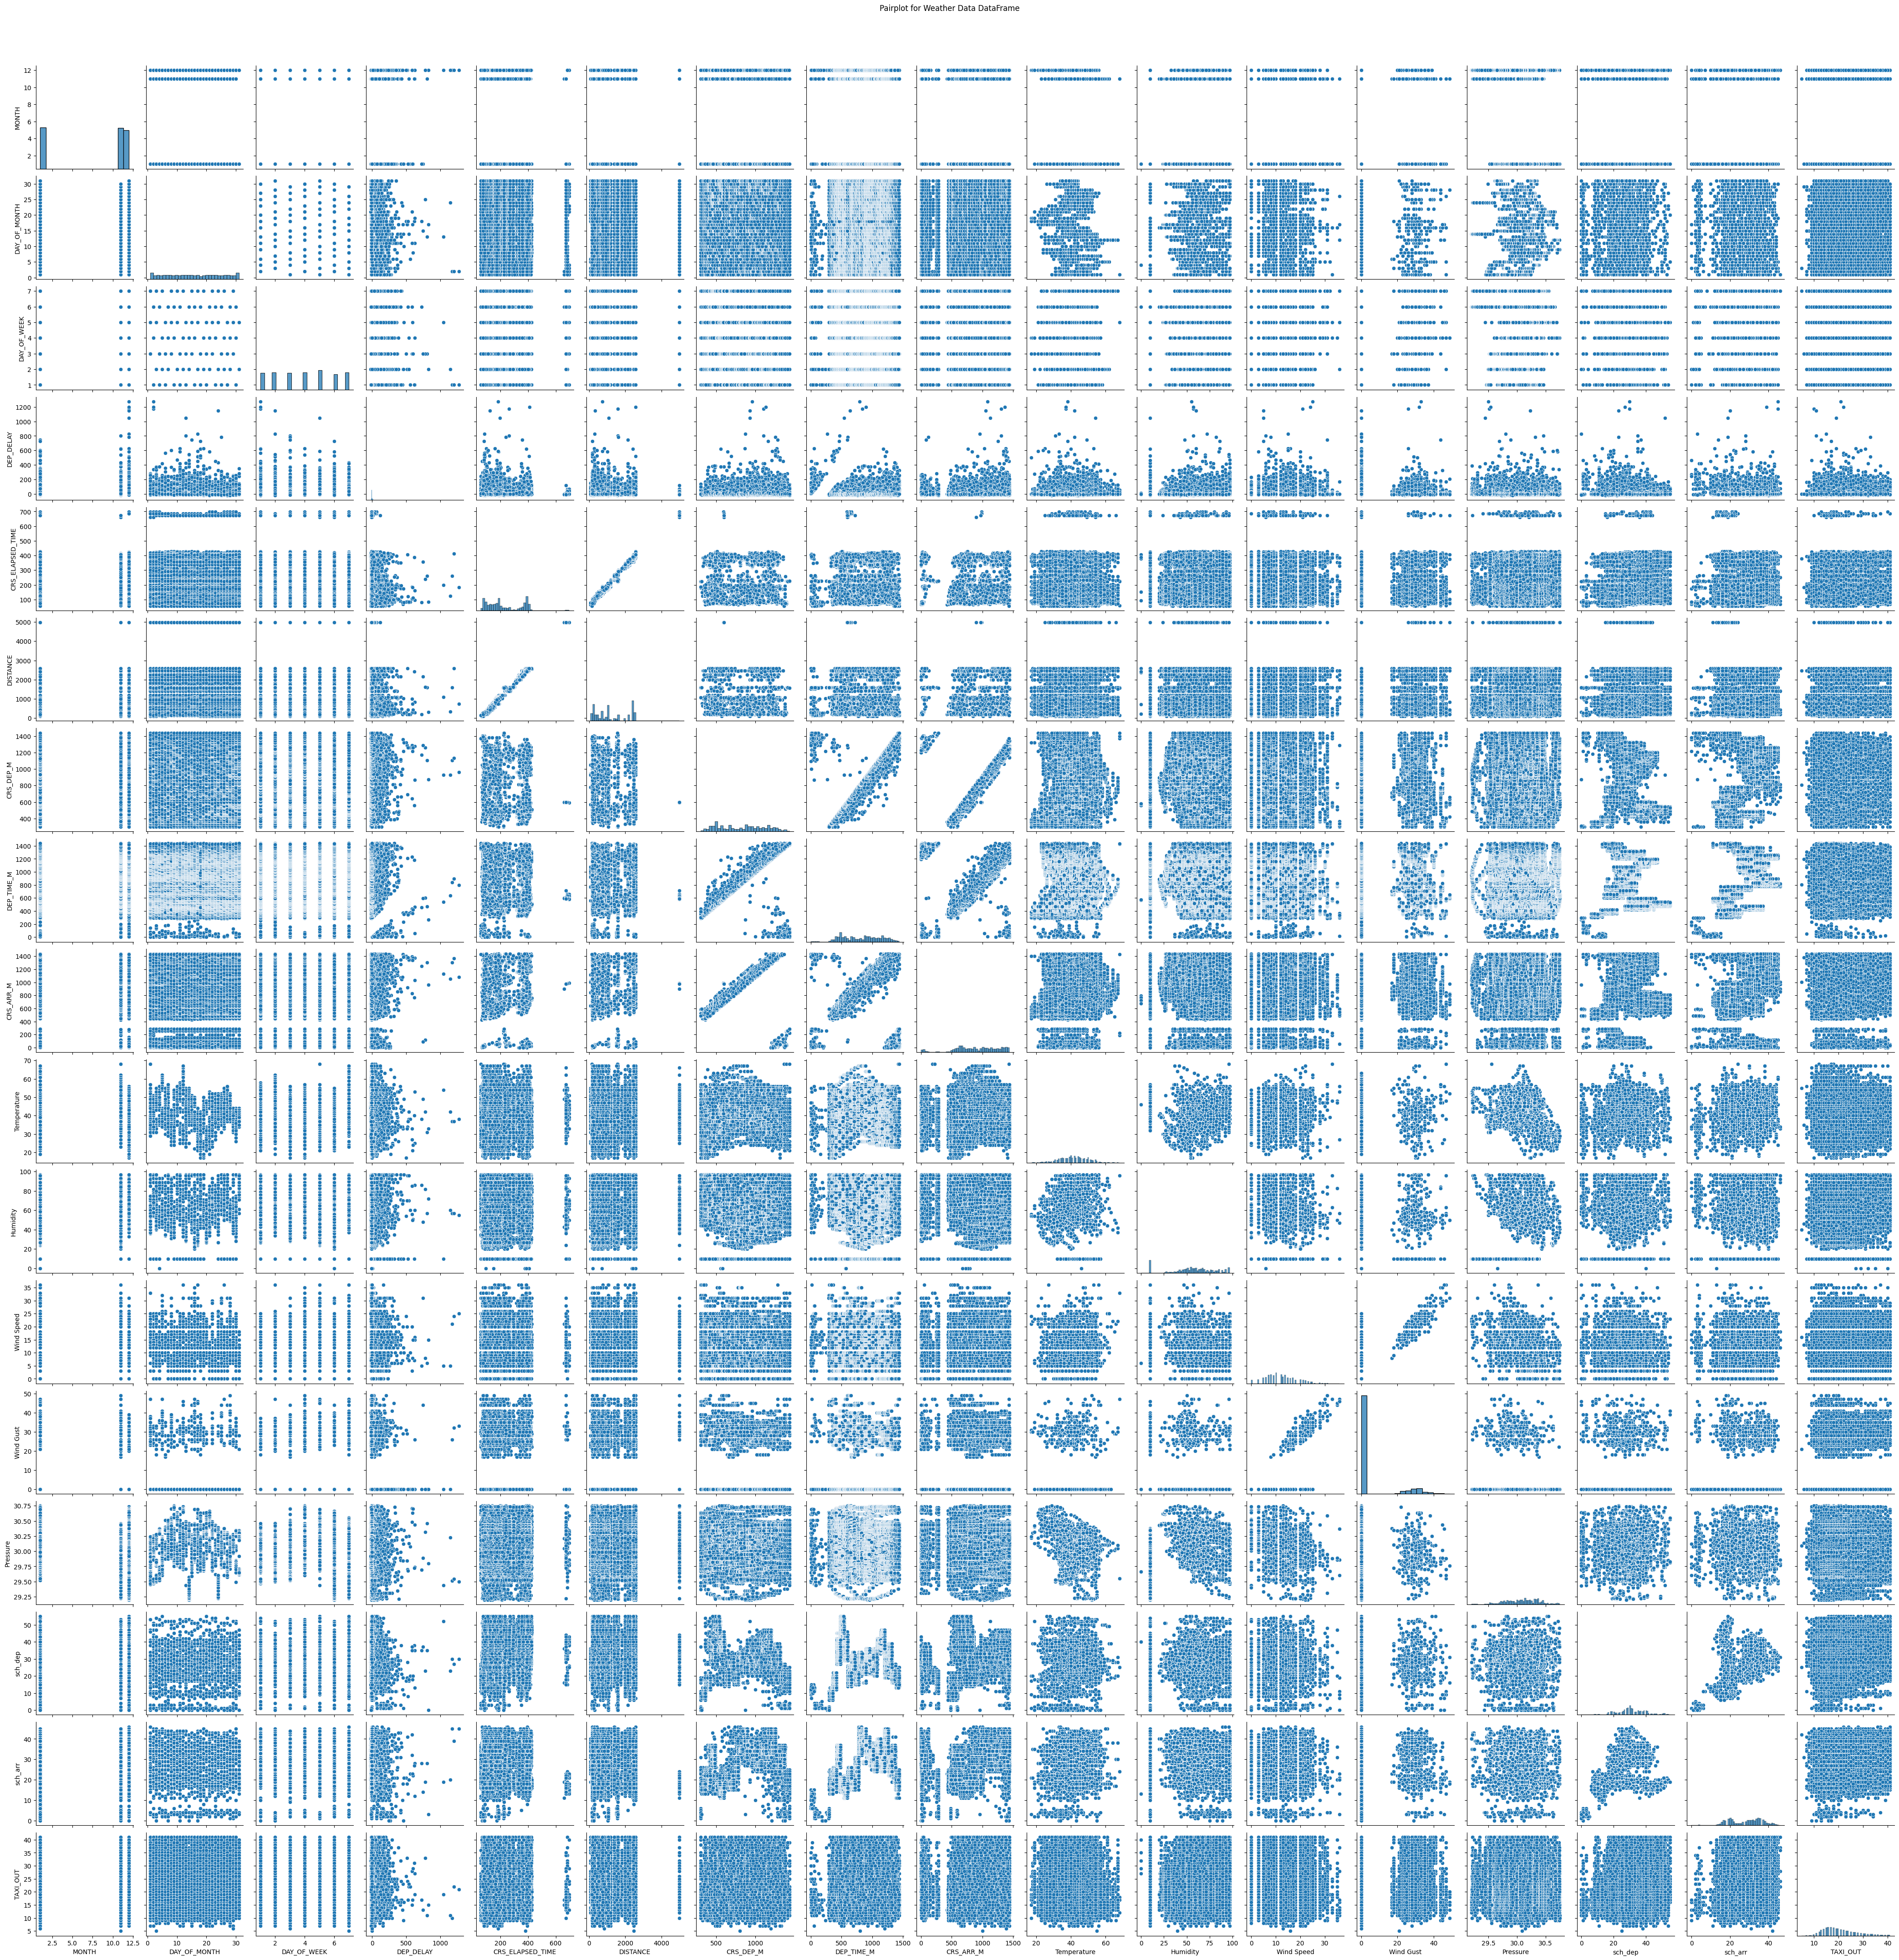

In [15]:

# Pairplot for weather_data
sns.pairplot(weather_data)
plt.suptitle("Pairplot for Weather Data DataFrame", y=1.02)
plt.show()


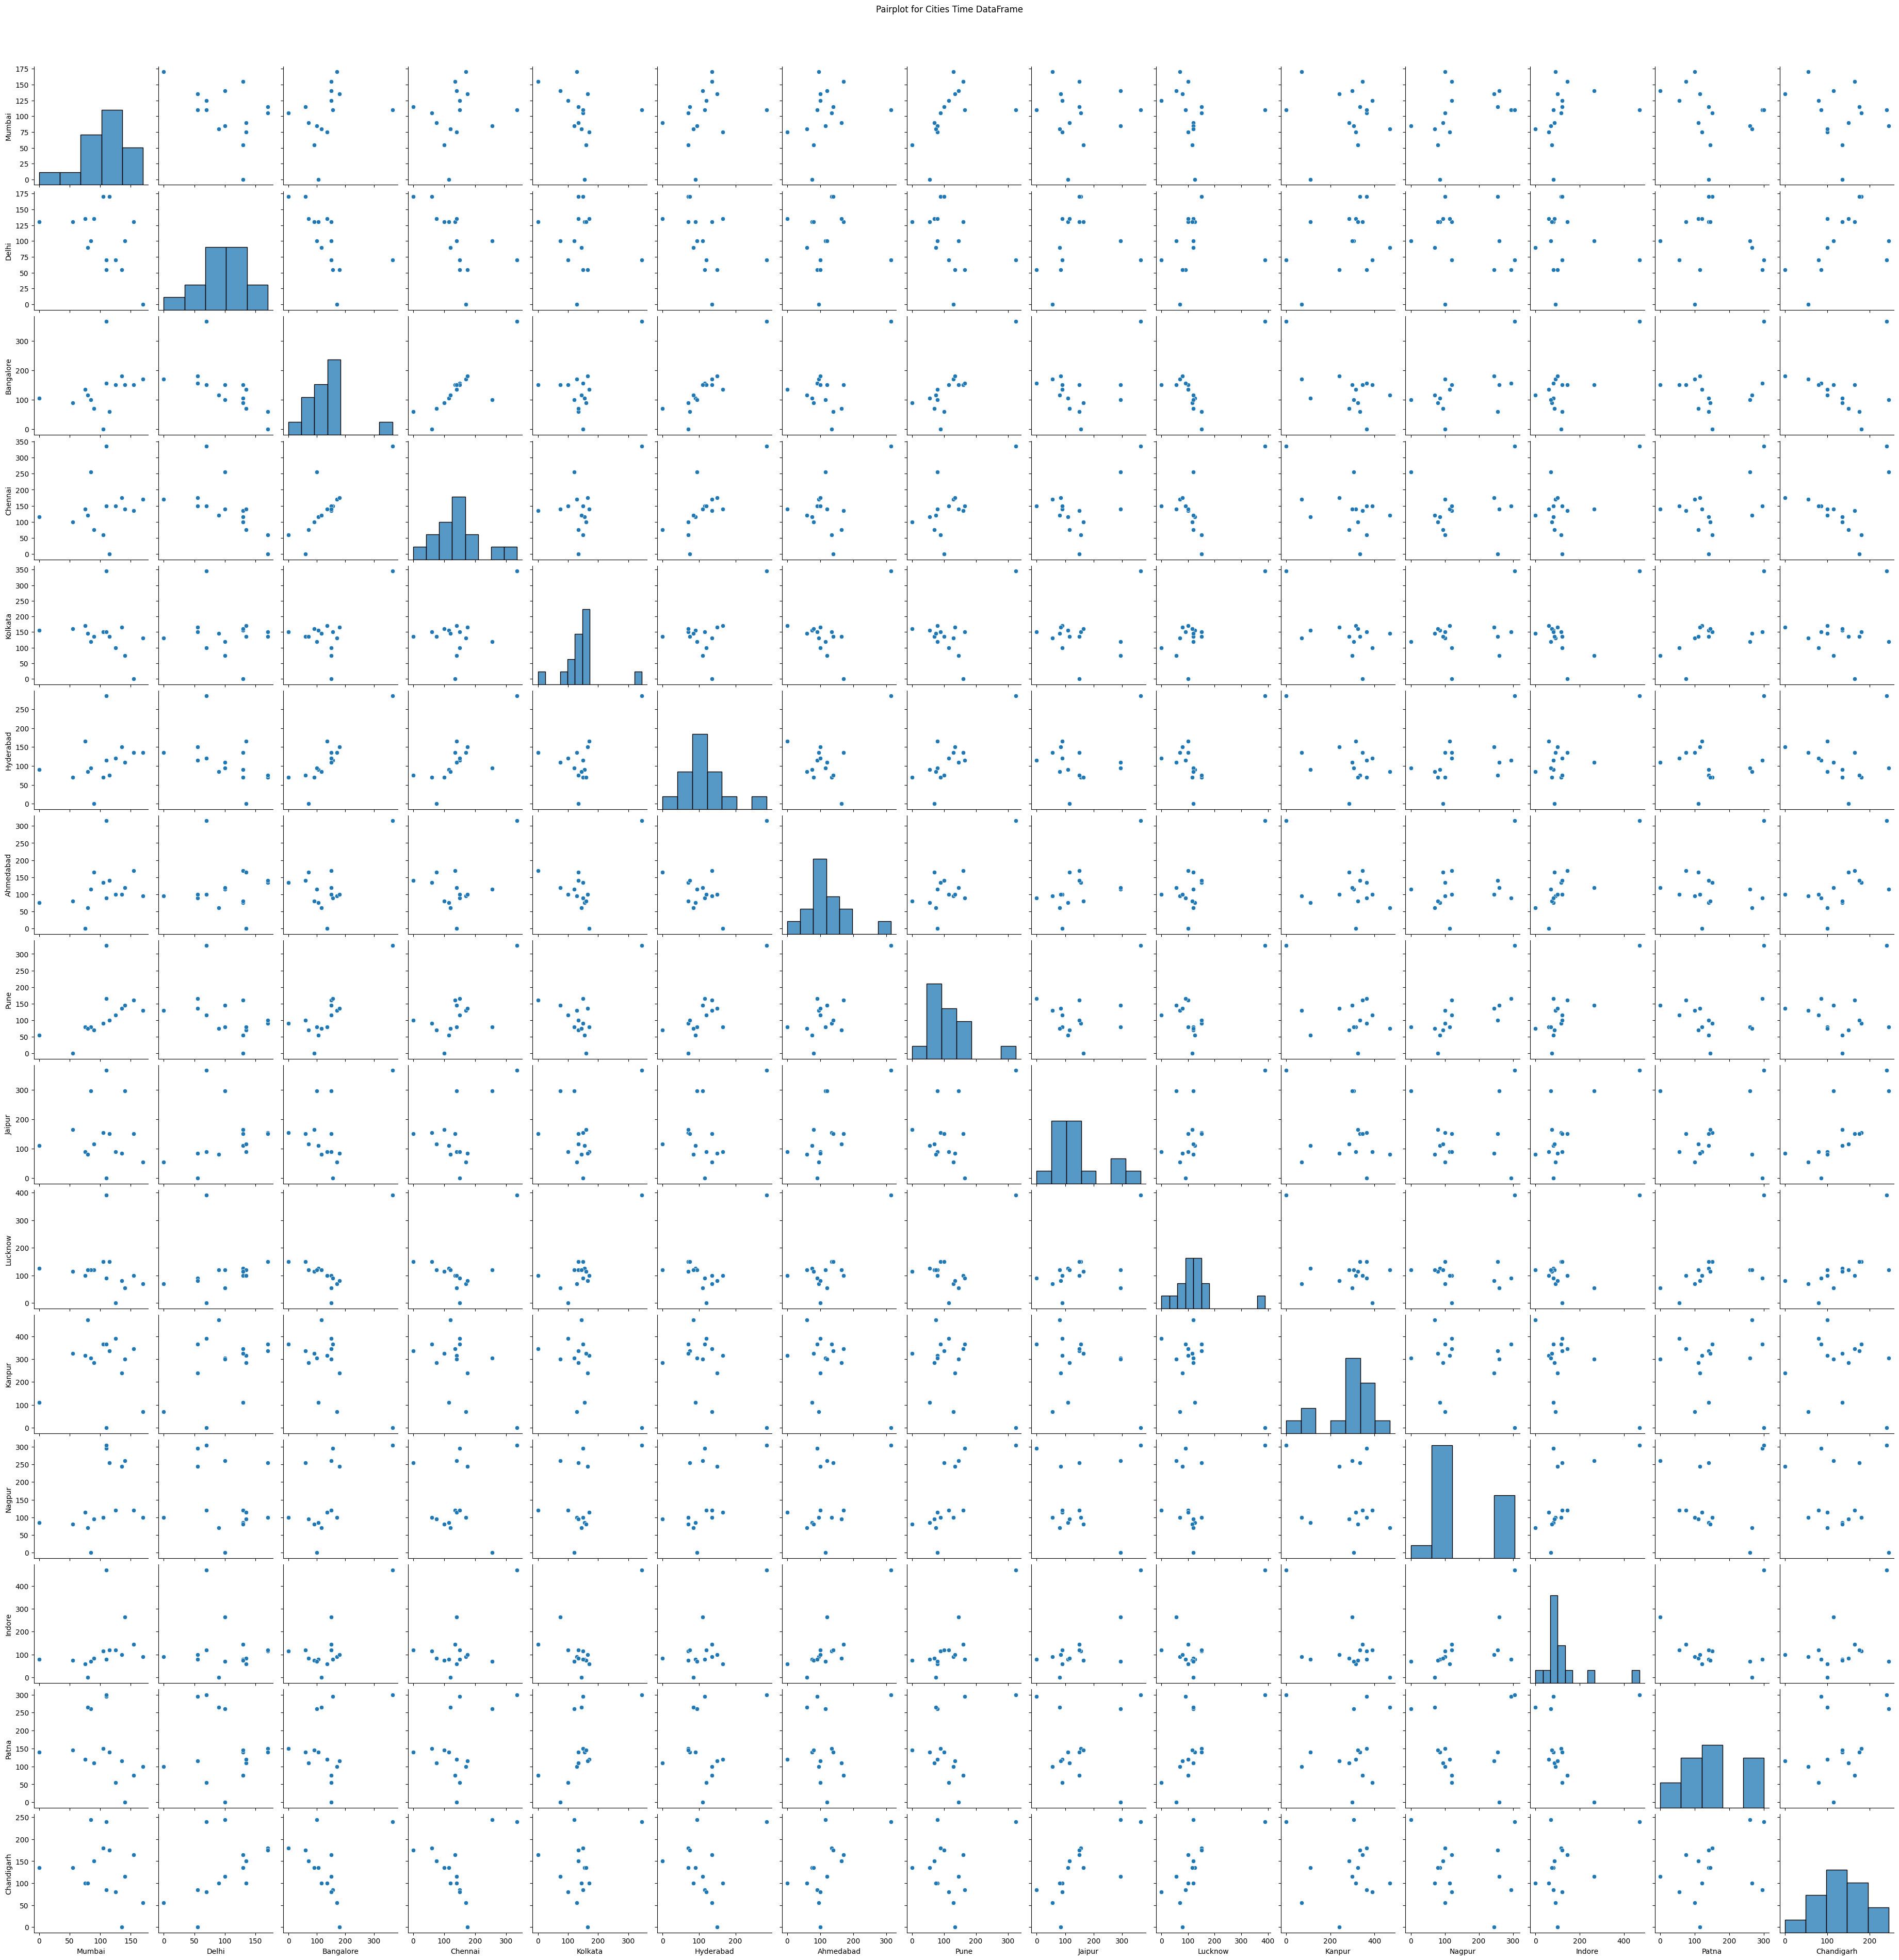

In [16]:

# Pairplot for cities_time
sns.pairplot(cities_time)
plt.suptitle("Pairplot for Cities Time DataFrame", y=1.02)
plt.show()